# Experimentos

Los experimentos se harán en una cuadrilla $[0,1]^2$, para esto, los puntos se intersan aleatoriamente dentro del dominio. 

Se define la función **move_point** para mover los puntos muy cercanos al borde por un $\epsilon$, y se insertan en el borde cercano

Luego se eliminan los puntos repetidos y la wea.

![image info](https://cdn.shopify.com/s/files/1/0414/9228/3547/files/quienes01.jpg?v=1614317195)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from scipy.stats import qmc
from scipy.spatial import Delaunay
import matplotlib.tri as tri

#Aux functions for generate samples
def move_point(max_number, xPoint , yPoint, tolerance):
    r =  np.random.uniform(0, 1)
    n = max_number
    if r > 0.5:
        if xPoint >= max_number*(1.0-tolerance): 
            xPoint = n
        if yPoint >= max_number*(1.0-tolerance): 
            yPoint = n
        if xPoint <= max_number*tolerance: 
            xPoint = 0
        if yPoint <= max_number*tolerance: 
            yPoint = 0
    else:
        if xPoint <= max_number*tolerance: 
            xPoint = 0            
        if yPoint <= max_number*tolerance: 
            yPoint = 0
        if xPoint >= max_number*(1.0-tolerance): 
            xPoint = n
        if yPoint >= max_number*(1.0-tolerance): 
            yPoint = n
    #print("returning", xPoint, yPoint)
    return (xPoint, yPoint)

def add_box(arr, tolerance):
    box = [[0, 0], [1, 1], [0, 1], [1, 0]]
    arr = np.append(arr, box, axis=0)
    np.unique(arr, axis=0)

    maxNumber = max(max(arr[:,0]), max(arr[:,1]))
    for i in range(0, len(arr)):
        new_p = move_point(1, arr[i,0], arr[i,1], tolerance)
        arr[i,0] = new_p[0]
        arr[i,1] = new_p[1]
    return arr

np.random.seed(545)
rng = 4554

# Random point generation

In [ ]:
startVertice = 500000
stopVertice = 500001
stepVertices = startVertice
tolerance = 0.001

RandomSample = np.random.rand(stopVertice - 4,2)
#RandomSample = add_box(RandomSample, tolerance)

import meshio

for i in range(startVertice, stopVertice, stepVertices):
    RandomSample = add_box(RandomSample, tolerance)
    RandomSubSample = RandomSample[:i]
    RandomSubSample 
    # each subSample generates a new triangulation
    randomDelaunay = Delaunay(RandomSubSample)
    randomTriangles =  [("triangle", randomDelaunay.simplices)]
    meshio.write_points_cells(str(len(RandomSubSample)) + "_random.off", RandomSubSample, randomTriangles)


# Experiment

In this section we run the benchmark

In [ ]:
import os

folder = "../build"

#os.system(folder + "/Polylla 100_random.off 100_random.out")

for i in range(startVertice, stopVertice, stepVertices):
    os.system(folder + "/Polylla " + str(i) + "_random.off " + str(i) + "random.out")

# Print meshes

We uses meshio to print the wea

In [ ]:
import meshio

#writte .OFF files
meshio.write_points_cells(str(len(RandomSample)) + "_random.off", RandomSample, randomTriangles)
print(str(len(RandomSample)) + "_random.off")

In [ ]:
import meshio
meshio.read("1000002_poisson.off")

In [14]:
import pygmsh
import meshio

with pygmsh.geo.Geometry() as geom:
    geom.add_polygon(
        [
            [0,1],[1,1],[1,0],[0,0],
        ],
        mesh_size=[1,0.01,0.01,1],
    )
    mesh = geom.generate_mesh()

# mesh.points, mesh.cells, ...

name =  str(len(mesh.points))+"_uniform_out.off"
meshio.write_points_cells(name,mesh.points,mesh.cells)

print(str(len(mesh.points))+"_uniform_out.off")





Warning: OFF only supports triangle cells. Skipping line, vertex.

545_uniform_out.off


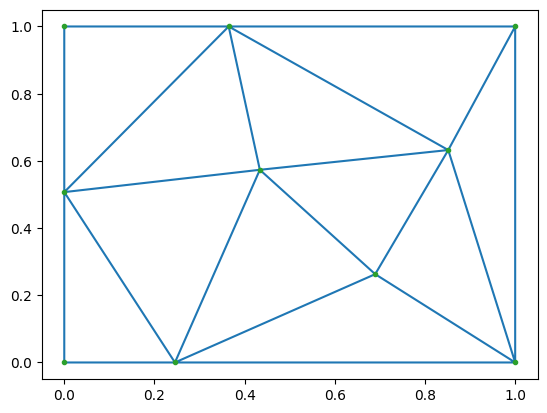

Number of points:  10


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from scipy.stats import qmc
from scipy.spatial import Delaunay
import matplotlib.tri as tri

#Aux functions for generate samples
def move_point(max_number, xPoint , yPoint, tolerance):
    r =  np.random.uniform(0, 1)
    n = max_number
    if r > 0.5:
        if xPoint >= max_number*(1.0-tolerance): 
            xPoint = n
        if yPoint >= max_number*(1.0-tolerance): 
            yPoint = n
        if xPoint <= max_number*tolerance: 
            xPoint = 0
        if yPoint <= max_number*tolerance: 
            yPoint = 0
    else:
        if xPoint <= max_number*tolerance: 
            xPoint = 0            
        if yPoint <= max_number*tolerance: 
            yPoint = 0
        if xPoint >= max_number*(1.0-tolerance): 
            xPoint = n
        if yPoint >= max_number*(1.0-tolerance): 
            yPoint = n
    #print("returning", xPoint, yPoint)
    return (xPoint, yPoint)

def add_box(arr, tolerance):
    box = [[0, 0], [1, 1], [0, 1], [1, 0]]
    arr = np.append(arr, box, axis=0)
    np.unique(arr, axis=0)

    maxNumber = max(max(arr[:,0]), max(arr[:,1]))
    for i in range(0, len(arr)):
        new_p = move_point(1, arr[i,0], arr[i,1], tolerance)
        arr[i,0] = new_p[0]
        arr[i,1] = new_p[1]
    return arr

np.random.seed(545)
rng = 4554



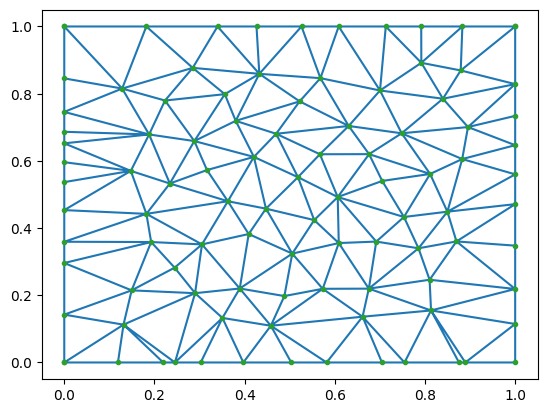

Number of points:  100


In [46]:

tolerance = 0.1 # max distance sfrom the boundaryv
radius = 0.083 #Poisson


engine = qmc.PoissonDisk(d=2, radius=radius, seed=rng)
sample = engine.fill_space()

sample = add_box(sample, tolerance)
poissonTriangulation = Delaunay(sample)
plt.triplot(sample[:,0], sample[:,1], poissonTriangulation.simplices.copy())
plt.plot(sample[:,0], sample[:,1], '.')
plt.show()
print("Number of points: ", len(sample))

poissonPoints = sample
poissonTriangles = poissonTriangulation.simplices.copy()

In [ ]:
def add_subsample(arr, subsample, tolerance):
    np.unique(subsample, axis=0)

    maxNumber = max(max(arr[:,0]), max(arr[:,1]))
    for i in range(0, len(arr)):
        new_p = move_point(1, arr[i,0], arr[i,1], tolerance)
        arr[i,0] = new_p[0]
        arr[i,1] = new_p[1]
    return arr

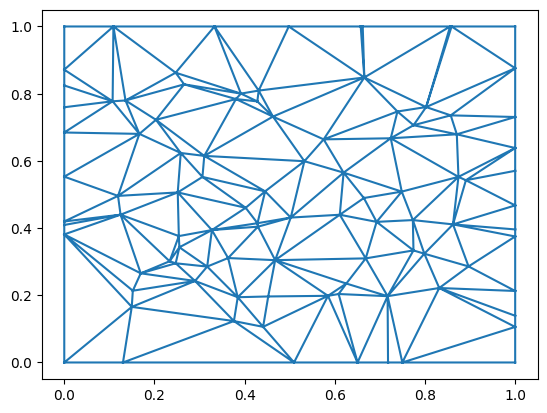

Number of points:  100


In [88]:
numVertices = 98 #Random points

RandomSample = np.random.rand(numVertices - 2,2)
RandomSample = add_box(RandomSample, tolerance)

randomDelaunay = Delaunay(RandomSample)
plt.triplot(RandomSample[:,0], RandomSample[:,1], randomDelaunay.simplices.copy())
plt.show()
print("Number of points: ", len(RandomSample))

randomPoints = RandomSample
randomTriangles = randomDelaunay.simplices.copy()

Number of points:  101


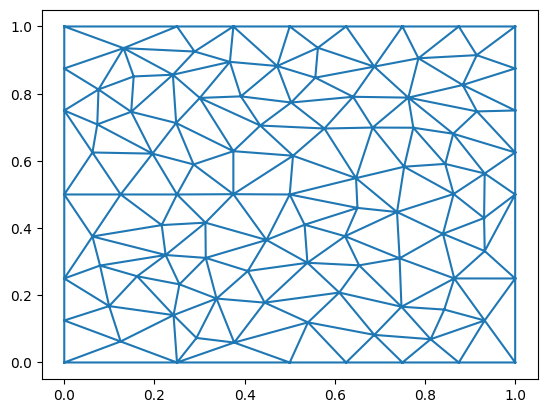

In [85]:
import triangle

areaMax = 0.008681#Semiuniform

t = triangle.triangulate({'vertices': [[0,1],[1,1],[1,0],[0,0]], 'segments': [[0,1],[1,2],[2,3],[3,0]]}, 'qa' + str(areaMax))
ver = t['vertices'].tolist()
simplex = t['triangles'].tolist()

ver = np.array(ver)

plt.triplot(ver[:,0], ver[:,1], simplex)

print("Number of points: ", len(ver))

semiUniformPoints = ver
semiUniformTriangles = simplex